# Simple usage

This notebook demonstrates basic usage of the *openTSNE* library. This is sufficient for almost all use-cases.

In [1]:
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger

import utils

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Load data

In most of the notebooks, we will be using the Macosko 2015 mouse retina data set. This is a fairly well-known and well explored data set in the single-cell literature making it suitable as an example.

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
x, y = iris["data"], iris["target"]

In [6]:
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 150 samples with 4 features


## Create train/test split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

In [8]:
print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

100 training samples
50 test samples


## Run t-SNE

We'll first create an embedding on the training data.

In [9]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    callbacks=ErrorLogger(),
    n_jobs=8,
    random_state=42,
)

In [10]:
%time embedding_train = tsne.fit(x_train)

Iteration   50, KL divergence  1.7452, 50 iterations in 0.6578 sec
Iteration  100, KL divergence  1.6381, 50 iterations in 0.8220 sec
Iteration  150, KL divergence  1.5666, 50 iterations in 0.6907 sec
Iteration  200, KL divergence  1.7200, 50 iterations in 0.7352 sec
Iteration  250, KL divergence  1.5570, 50 iterations in 0.7648 sec
Iteration   50, KL divergence  0.1369, 50 iterations in 0.3588 sec
Iteration  100, KL divergence  0.0845, 50 iterations in 0.3164 sec
Iteration  150, KL divergence  0.0817, 50 iterations in 0.2446 sec
Iteration  200, KL divergence  0.0807, 50 iterations in 0.2326 sec
Iteration  250, KL divergence  0.0808, 50 iterations in 0.2282 sec
Iteration  300, KL divergence  0.0806, 50 iterations in 0.2398 sec
Iteration  350, KL divergence  0.0808, 50 iterations in 0.2352 sec
Iteration  400, KL divergence  0.0813, 50 iterations in 0.3458 sec
Iteration  450, KL divergence  0.0814, 50 iterations in 0.2786 sec
Iteration  500, KL divergence  0.0817, 50 iterations in 0.2569

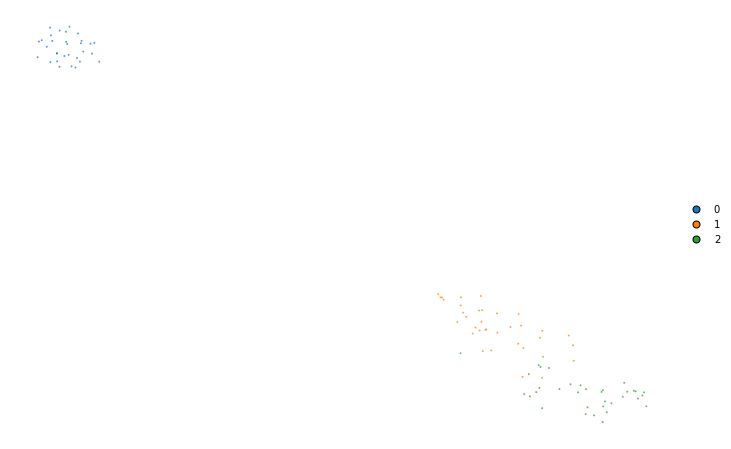

In [12]:
utils.plot(embedding_train, y_train)

## Transform

openTSNE is currently the only library that allows embedding new points into an existing embedding.

In [13]:
%time embedding_test = embedding_train.transform(x_test)

CPU times: user 476 ms, sys: 10.1 ms, total: 486 ms
Wall time: 253 ms


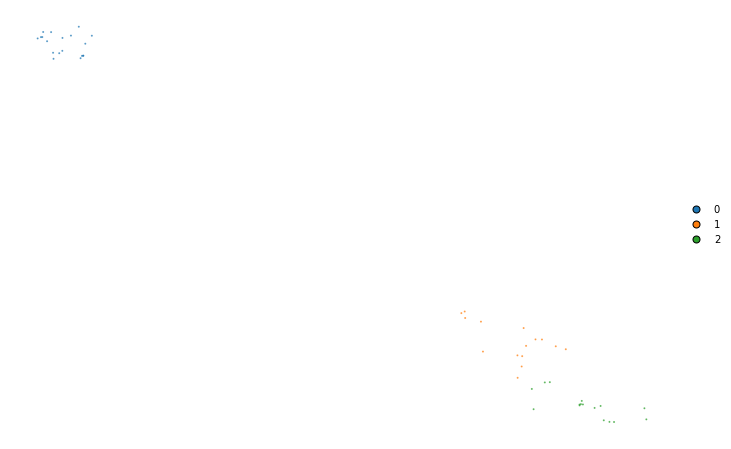

In [15]:
utils.plot(embedding_test, y_test)

## Together

We superimpose the transformed points onto the original embedding with larger opacity.

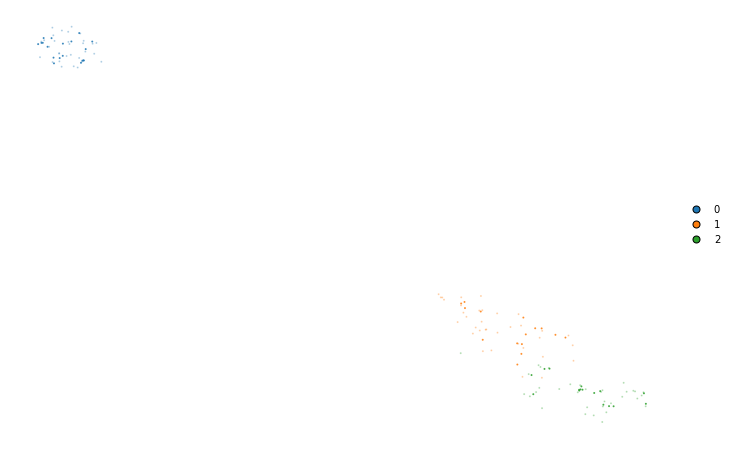

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
utils.plot(embedding_train, y_train, alpha=0.25, ax=ax)
utils.plot(embedding_test, y_test, alpha=0.75, ax=ax)

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
x, y = iris["data"], iris["target"]

In [7]:
from annoy import AnnoyIndex
import random

size = len(x)
t = AnnoyIndex(size)  # Length of item vector that will be indexed
for i in range(1000):
    v = [random.gauss(0, 1) for z in range(size)]
    t.add_item(i, v)

t.build(10) # 10 trees
t.save('test.ann')

# ...

u = AnnoyIndex(size)
u.load('test.ann') # super fast, will just mmap the file
print(u.get_nns_by_item(0, 1000, include_distances=True)) # will find the 1000 nearest neighbors

u.get_n_items()
u.get_n_trees()

([0, 550, 210, 803, 940, 74, 420, 24, 120, 387, 177, 877, 356, 345, 239, 788, 898, 397, 117, 221, 153, 762, 941, 442, 318, 604, 13, 80, 203, 926, 855, 802, 925, 800, 181, 584, 489, 652, 995, 308, 172, 490, 912, 429, 173, 438, 432, 587, 34, 792, 921, 575, 904, 332, 997, 727, 683, 274, 798, 955, 27, 412, 59, 1, 796, 822, 227, 634, 207, 889, 978, 968, 474, 461, 885, 894, 70, 371, 144, 10, 452, 808, 465, 866, 382, 710, 282, 927, 35, 549, 725, 946, 772, 321, 255, 738, 197, 519, 211, 832, 656, 561, 135, 493, 878, 650, 83, 95, 180, 831, 729, 19, 555, 967, 115, 424, 865, 862, 639, 528, 240, 385, 480, 362, 137, 114, 185, 922, 816, 899, 603, 950, 737, 748, 938, 619, 484, 882, 110, 147, 601, 341, 64, 482, 242, 592, 138, 937, 902, 628, 530, 535, 944, 50, 71, 934, 415, 609, 843, 158, 711, 665, 702, 673, 533, 486, 90, 532, 232, 733, 268, 536, 974, 3, 698, 769, 439, 777, 140, 403, 488, 631, 515, 544, 94, 525, 682, 58, 645, 836, 169, 597, 103, 463, 534, 313, 346, 167, 851, 218, 434, 817, 689, 686, 105

10

In [9]:
import csv
import ngtpy

# create an index framwork in filesystem.
ngtpy.create(path=b'index', dimension=128, distance_type="L2")

# load objects.
objects = []
with open(b'../../data/sift-dataset-5k.tsv', 'r') as fp:
    for object in csv.reader(fp, delimiter = '\t'):
        objects.append(object[0:128])

# open index.
index = ngtpy.Index(b'index')

# insert the objects.
index.batch_insert(objects)

# save the index.
index.save()

# close the index.
index.close()

# open the index.
index = ngtpy.Index(b'index')

# load query data.
with open(b'../../data/sift-query-3.tsv', 'r') as fp:
    query = list(csv.reader(fp, delimiter = '\t'))

# search for the index with the first query.
results = index.search(query[0], size=5)

print('ID\tDistance');
for result in results:
    print('{}\t{}'.format(*result))
print('# of distance computations=' + str(index.get_num_of_distance_computations()))

# get an object in the index.
object = index.get_object(4078)

# search with the object in the index.
results = index.search(object, size=5)

print('\nID\tDistance');
for result in results:
    print('{}\t{}'.format(*result))
print('# of distance computations=' + str(index.get_num_of_distance_computations()))

# insert the same objects individually. not build the index for them.
with open(b'../../data/sift-dataset-5k.tsv', 'r') as fp:
    for object in csv.reader(fp, delimiter = '\t'):
        objectID = index.insert(object[0:128])
        if objectID % 1000 == 0:
            print('Processed {} objects.'.format(objectID))

# build the index for the inserted objects to search.
index.build_index()

# search with the first query to confirm the insertion.
results = index.search(query[0], size=6)

# get the search results.
print('\nID\tDistance');
for result in results:
    print('{}\t{}'.format(*result))
print('# of distance computations=' + str(index.get_num_of_distance_computations()))

# remove an object.
index.remove(3030)

# search with the first query to confirm the removal.
results = index.search(query[0], size=6)
print('\nID\tDistance');
for result in results:
    print('{}\t{}'.format(*result))
print('# of distance computations=' + str(index.get_num_of_distance_computations()))

index.save()
index.close()

ModuleNotFoundError: No module named 'ngtpy'